# Global Economic Analysis: Trends and Disparities in GDP
## Project Overview
This project analyzes global GDP data to identify trends and differences in economic performance across various regions. Using a detailed dataset that includes GDP information from around the world, the analysis explores key factors that affect economic growth rates. The goal is to gain insights into these patterns and understand the underlying dynamics of global economic performance.

## Objectives

1. **Analyze Global GDP and GDP PPP (Purchasing Power Parity)**
   - Examine GDP and GDP PPP across regions in 2023.
   - Calculate the average GDP and GDP PPP for each region.
   - Assess the GDP percentage increase for each region from 1991 to 2023.
     
2. **Analyze GDP per Capita (PPP)**
   - Evaluate the GDP per capita (PPP) for each region in 2023.
   - Track changes in GDP per capita over the past decades and identify percentage changes for each region.

3. **Analyze GDP Growth Rates**
   - Identify regions with the highest and lowest average annual GDP growth rates from 1991 to 2023.
   - Investigate GDP growth recovery in regions post-2008 and 2020 economic downturns.

4. **Assess Economic Disparities Across Income Levels**
   - Explore disparities in economic growth between low-income and high-income regions.
   - Determine the percentage contribution of each income group to global GDP.
up to global GDP.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Read the CSV file

In [2]:
df=pd.read_csv('world_data_analysis.csv')

In [3]:
df.head()

,Region,Region Code,Year,GDP (current US$),"GDP per capita, PPP (constant 2021 international $)",GDP per capita growth (annual %),"GDP, PPP (constant 2021 international $)",GDP growth (annual %)
0,Upper middle income,UMC,1991.0,2.258540e+12,5989.364541,1.473217,1.271330e+13,3.073291
1,Upper middle income,UMC,1992.0,2.440010e+12,6098.912303,3.042576,1.313130e+13,4.518453
2,Upper middle income,UMC,1993.0,2.768810e+12,6285.094666,4.493666,1.371180e+13,5.880825
3,Upper middle income,UMC,1994.0,3.116050e+12,6439.470479,4.184566,1.422840e+13,5.518071
4,Upper middle income,UMC,1995.0,3.534600e+12,6598.072014,3.137067,1.475970e+13,4.416985


### Let's check the info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Region                                               563 non-null    object 
 1   Region Code                                          561 non-null    object 
 2   Year                                                 561 non-null    float64
 3   GDP (current US$)                                    561 non-null    float64
 4   GDP per capita, PPP (constant 2021 international $)  561 non-null    float64
 5   GDP per capita growth (annual %)                     561 non-null    float64
 6   GDP, PPP (constant 2021 international $)             561 non-null    float64
 7   GDP growth (annual %)                                561 non-null    float64
dtypes: float64(6), object(2)
memory usage: 35.5+ KB


## DATA CLEANING !

### Check for duplicates and drop duplicates

In [5]:
df.duplicated().any()

True

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().any()

False

### Check for missing values and drop them

In [8]:
df.isnull().sum()

Region                                                 1
Region Code                                            3
Year                                                   3
GDP (current US$)                                      3
GDP per capita, PPP (constant 2021 international $)    3
GDP per capita growth (annual %)                       3
GDP, PPP (constant 2021 international $)               3
GDP growth (annual %)                                  3
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().any()

Region                                                 False
Region Code                                            False
Year                                                   False
GDP (current US$)                                      False
GDP per capita, PPP (constant 2021 international $)    False
GDP per capita growth (annual %)                       False
GDP, PPP (constant 2021 international $)               False
GDP growth (annual %)                                  False
dtype: bool

In [11]:
df.columns

Index(['Region', 'Region Code', 'Year', 'GDP (current US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GDP per capita growth (annual %)',
       'GDP, PPP (constant 2021 international $)', 'GDP growth (annual %)'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 561 entries, 0 to 560
Data columns (total 8 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Region                                               561 non-null    object 
 1   Region Code                                          561 non-null    object 
 2   Year                                                 561 non-null    float64
 3   GDP (current US$)                                    561 non-null    float64
 4   GDP per capita, PPP (constant 2021 international $)  561 non-null    float64
 5   GDP per capita growth (annual %)                     561 non-null    float64
 6   GDP, PPP (constant 2021 international $)             561 non-null    float64
 7   GDP growth (annual %)                                561 non-null    float64
dtypes: float64(6), object(2)
memory usage: 39.4+ KB


We have 8 columns and 561 rows in total. Region and Region code are type: string and the rest are floats

### Change the Year column from type:string to integer

In [13]:
df['Year'] = df['Year'].astype('int32')

In [14]:
df.head() #check the first five rows in the dataset

,Region,Region Code,Year,GDP (current US$),"GDP per capita, PPP (constant 2021 international $)",GDP per capita growth (annual %),"GDP, PPP (constant 2021 international $)",GDP growth (annual %)
0,Upper middle income,UMC,1991,2.258540e+12,5989.364541,1.473217,1.271330e+13,3.073291
1,Upper middle income,UMC,1992,2.440010e+12,6098.912303,3.042576,1.313130e+13,4.518453
2,Upper middle income,UMC,1993,2.768810e+12,6285.094666,4.493666,1.371180e+13,5.880825
3,Upper middle income,UMC,1994,3.116050e+12,6439.470479,4.184566,1.422840e+13,5.518071
4,Upper middle income,UMC,1995,3.534600e+12,6598.072014,3.137067,1.475970e+13,4.416985


In [15]:
df['Year'].unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [16]:
df.describe()

,Year,GDP (current US$),"GDP per capita, PPP (constant 2021 international $)",GDP per capita growth (annual %),"GDP, PPP (constant 2021 international $)",GDP growth (annual %)
count,561.000000,5.610000e+02,561.000000,561.000000,5.610000e+02,561.000000
mean,2007.000000,1.191728e+13,18876.717121,1.898692,2.234931e+13,3.342778
std,9.530402,1.751441e+13,16996.750014,2.498857,2.858354e+13,2.495864
min,1991.000000,9.252975e+10,1531.957386,-10.644569,4.892060e+11,-10.865378
25%,1999.000000,8.859730e+11,4756.308419,0.642607,3.022070e+12,2.069747
50%,2007.000000,4.287680e+12,13750.293840,2.095396,1.213770e+13,3.478124
75%,2015.000000,1.678090e+13,28098.652660,3.433023,2.761860e+13,5.053174
max,2023.000000,1.054350e+14,71737.179920,8.584924,1.658060e+14,9.927427


### create a new columns(GDP (in billions)) 

In [17]:
# Step 1: Convert GDP to billions (as float)
df['GDP (in billions)'] = df['GDP (current US$)'] / 1_000_000_000
df['GDP, PPP (in billions)'] = df['GDP, PPP (constant 2021 international $)'] / 1_000_000_000
# Display the updated DataFrame
df.head(2)


,Region,Region Code,Year,GDP (current US$),"GDP per capita, PPP (constant 2021 international $)",GDP per capita growth (annual %),"GDP, PPP (constant 2021 international $)",GDP growth (annual %),GDP (in billions),"GDP, PPP (in billions)"
0,Upper middle income,UMC,1991,2.258540e+12,5989.364541,1.473217,1.271330e+13,3.073291,2258.54,12713.3
1,Upper middle income,UMC,1992,2.440010e+12,6098.912303,3.042576,1.313130e+13,4.518453,2440.01,13131.3


# Data Exploration and Analysis

## Objective 1: Analysing GDP PPP, and GDP

### i) What is GDP PPP, and GDP across different regions in 2023?

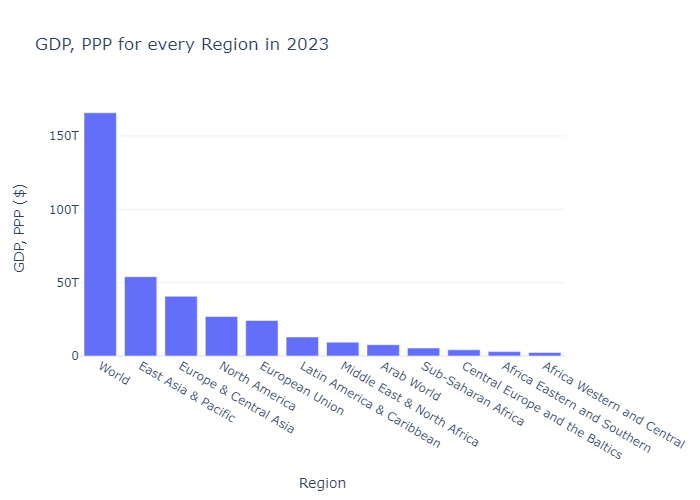

In [18]:
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

gdp_ppp_2023 = df_filtered[df_filtered['Year'] == 2023]

# Select relevant columns
gdp_ppp_regions = gdp_ppp_2023[['Region', 'GDP, PPP (constant 2021 international $)']]
gdp_ppp_regions=gdp_ppp_regions.sort_values(by='GDP, PPP (constant 2021 international $)', ascending=False)

fig = px.bar(
   gdp_ppp_regions, 
    x='Region', 
    y='GDP, PPP (constant 2021 international $)', 
    title='GDP, PPP for every Region in 2023', 
    labels={'GDP, PPP (constant 2021 international $)': 'GDP, PPP ($)', 'Region': 'Region'}, 
    template='plotly_white'
)

# Show the figure
fig.show("png")


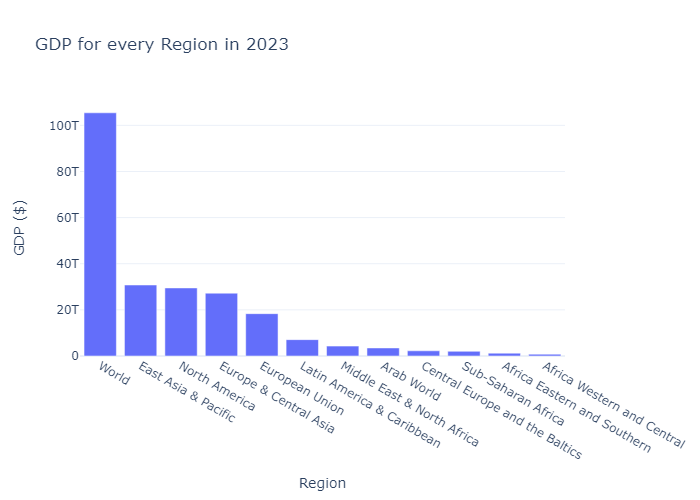

In [19]:
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

gdp_2023 = df_filtered[df_filtered['Year'] == 2023]

# Select relevant columns
gdp_regions = gdp_2023[['Region', 'GDP (current US$)']]
gdp_regions=gdp_regions.sort_values(by='GDP (current US$)', ascending=False)

fig = px.bar(
   gdp_regions, 
    x='Region', 
    y='GDP (current US$)', 
    title='GDP for every Region in 2023', 
    labels={'GDP (current US$)': 'GDP ($)', 'Region': 'Region'}, 
    template='plotly_white'
)

# Show the figure
fig.show("png")


### ii) What is the percentage contribution of each region to the world GDP?

In [55]:
# Calculate total GDP of the world
total_gdp_world = gdp_2023[gdp_2023['Region'] == 'World']['GDP (current US$)'].values[0]

# Add a new column for percentage contribution of each region using .loc
gdp_2023.loc[:, 'Percentage Contribution'] = (gdp_2023['GDP (current US$)'] / total_gdp_world) * 100

# Select relevant columns for display
gdp_contributions = gdp_2023[['Region', 'GDP (current US$)', 'Percentage Contribution']].copy()
gdp_contributions = gdp_contributions.sort_values(by='Percentage Contribution', ascending=False)

# Display the resulting DataFrame
gdp_contributions


,Region,GDP (current US$),Percentage Contribution
197,World,1.054350e+14,100.000000
164,High income,6.765370e+13,64.166264
65,Middle income,3.678690e+13,34.890596
32,Upper middle income,2.940370e+13,27.887988
131,Lower middle income,7.384750e+12,7.004078
98,Low income,6.467980e+11,0.613457


The data shows that the global GDP is primarily concentrated in East Asia & Pacific, North America, and Europe & Central Asia, which together make up over 80% of the world’s GDP. Other regions, such as Latin America & Caribbean, Middle East & North Africa, and Sub-Saharan Africa, contribute significantly less, highlighting global economic disparities.

### iii) What are the average GDP and GDP PPP across different regions?

In [21]:

# Calculate mean GDP PPP in billions
average_gdp_ppp = df_filtered.groupby('Region')['GDP, PPP (in billions)'].mean().reset_index()
average_gdp=df_filtered.groupby('Region')['GDP (in billions)'].mean().sort_values(ascending=False).reset_index()
# Merge the two DataFrames on 'Country Name'

average_gdp_combined = pd.merge(average_gdp, average_gdp_ppp, on='Region')
average_gdp_combined .columns = ['Region', 'Average GDP (PPP in billions)', 'Average GDP (in billions USD)']

average_gdp_combined 

,Region,Average GDP (PPP in billions),Average GDP (in billions USD)
0,World,57644.066667,104717.375758
1,Europe & Central Asia,17419.132727,30878.818182
2,North America,15635.725758,19426.166667
3,East Asia & Pacific,15556.527576,28092.945455
4,European Union,12136.467576,19181.018182
5,Latin America & Caribbean,3922.123939,9371.526364
6,Middle East & North Africa,2185.371909,6017.216970
7,Arab World,1711.320545,4933.065152
8,Sub-Saharan Africa,1110.783848,3283.556970
9,Central Europe and the Baltics,1035.228697,2765.760606


### iii) What is the GDP percentage increase for each region since 1991-2023. 

In [22]:
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

# Filter data for 1991 and 2023
data_1991 = df_filtered[df_filtered['Year'] == 1991][['Region', 'GDP (current US$)']]
data_2023 = df_filtered[df_filtered['Year'] == 2023][['Region', 'GDP (current US$)']]

# Rename the columns for clarity
data_1991.columns = ['Region', 'GDP_1991']
data_2023.columns = ['Region', 'GDP_2023']

# Merge the two datasets on 'Country Name'
gdp_comparison = pd.merge(data_1991, data_2023, on='Region')

# Calculate the percentage increase
gdp_comparison['GDP Percentage Increase'] = ((gdp_comparison['GDP_2023'] - gdp_comparison['GDP_1991']) / gdp_comparison['GDP_1991']) * 100

# Display the result
gdp_comparison=gdp_comparison[['Region', 'GDP Percentage Increase']].sort_values(by='GDP Percentage Increase',ascending=False).reset_index(drop=True)
gdp_comparison

,Region,GDP Percentage Increase
0,Central Europe and the Baltics,802.017856
1,Middle East & North Africa,680.455130
2,Arab World,648.652369
3,Africa Western and Central,513.031968
4,Latin America & Caribbean,496.172205
5,East Asia & Pacific,468.569491
6,Sub-Saharan Africa,405.868095
7,Africa Eastern and Southern,351.907013
8,World,342.565355
9,North America,335.735918


This table illustrates the GDP percentage increase for each region, showing that Central Europe and the Baltics had the highest increase, while the European Union had the lowest among the listed regions.

The world overall saw a GDP increase of 342.57% during this time. While Africa Western and Central, Sub-Saharan Africa and Africa Eastern and Southern have grown faster than the global average, the last three regions—North America, Europe & Central Asia, and the European Union—have not kept pace, showing a difference in growth patterns.

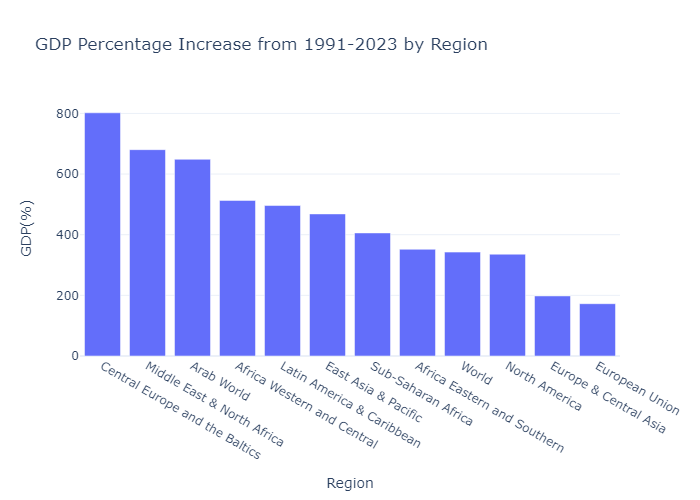

In [23]:

# Plot the GDP percentage increase as a bar graph, excluding the specified income classifications
fig = px.bar(
    gdp_comparison, 
    x='Region', 
    y='GDP Percentage Increase', 
    title='GDP Percentage Increase from 1991-2023 by Region', 
    labels={'GDP Percentage Increase': 'GDP(%)', 'Region': 'Region'}, 
    template='plotly_white'
)

# Show the figure
fig.show("png")


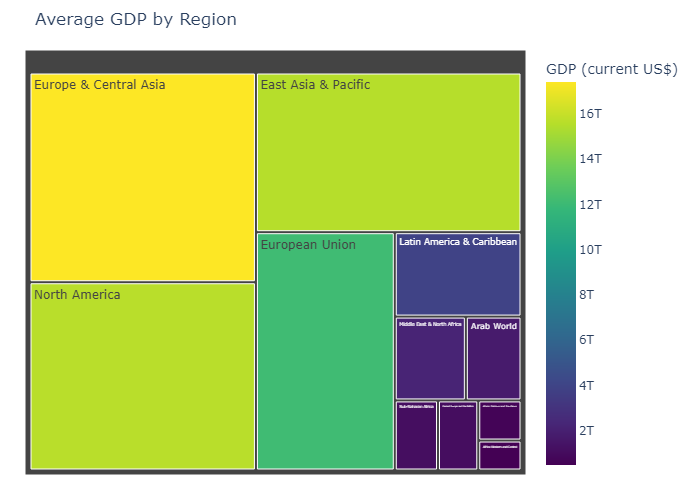

In [24]:
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income', 'World'])]

# Aggregating GDP per capita by region (average GDP per capita per region)
region_gdp = df_filtered.groupby('Region')['GDP (current US$)'].mean().reset_index()

# Creating a heatmap using Plotly Express
fig = px.treemap(region_gdp, 
                 path=['Region'], 
                 values='GDP (current US$)',
                 color='GDP (current US$)', 
                 color_continuous_scale='Viridis',
                 title='Average GDP by Region')

# Update layout for better visualization
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show the figure
fig.show("png")

## Objective 2: Analysing GDP per capita (PPP)

### i) What is the GDP per capita, PPP in 2023 by region. 

In [25]:
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

gdp_capita_2023 = df_filtered[df_filtered['Year'] == 2023]

# Select relevant columns
gdp_capita_regions = gdp_capita_2023[['Region', 'GDP per capita, PPP (constant 2021 international $)']]
gdp_capita_regions=gdp_capita_regions.sort_values(by='GDP per capita, PPP (constant 2021 international $)', ascending=False)
gdp_capita_regions

,Region,"GDP per capita, PPP (constant 2021 international $)"
560,North America,71737.179920
461,European Union,53789.101060
395,Europe & Central Asia,44035.590880
362,Central Europe and the Baltics,42391.250130
428,East Asia & Pacific,22714.448010
197,World,20661.201680
494,Latin America & Caribbean,19458.858260
527,Middle East & North Africa,18887.409090
263,Arab World,16288.054300
329,Africa Western and Central,4857.987533


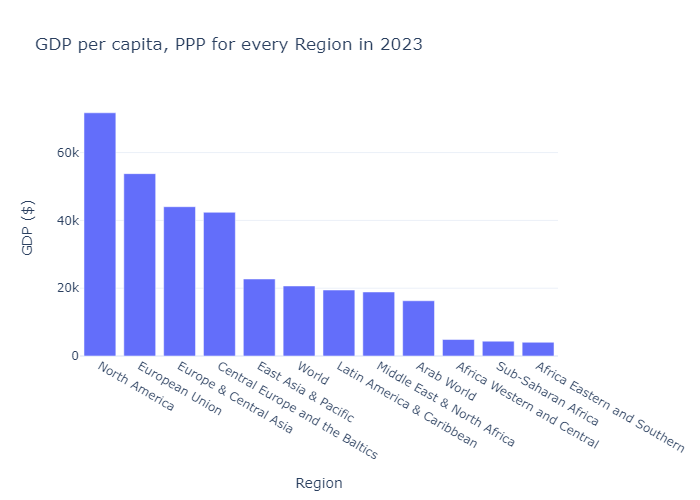

In [26]:
fig = px.bar(
   gdp_capita_regions, 
    x='Region', 
    y='GDP per capita, PPP (constant 2021 international $)', 
    title='GDP per capita, PPP for every Region in 2023', 
    labels={'GDP per capita, PPP (constant 2021 international $)': 'GDP ($)', 'Region': 'Region'}, 
    template='plotly_white'
)

# Show the figure
fig.show("png")


### i) How has GDP per capita changed over the last few decades in various regions? What is the percentage change for every region?

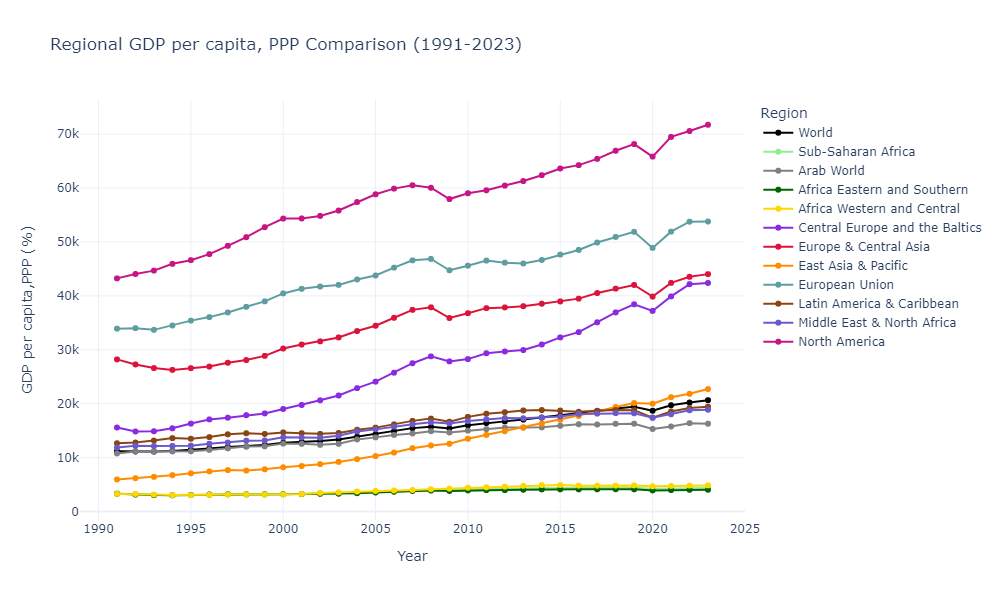

In [27]:
# Filter out the specified rows
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

custom_colors = ['#000000', '#90EE90', '#808080', '#006400', '#FFD700', '#8A2BE2', '#DC143C', '#FF8C00', '#5F9EA0', '#8B4513', '#6A5ACD', '#C71585']

# Plotly line chart with custom color sequence using filtered data
fig = px.line(
    df_filtered, 
    x='Year', 
    y='GDP per capita, PPP (constant 2021 international $)', 
    color='Region',  
    title='Regional GDP per capita, PPP Comparison (1991-2023)',  
    labels={'GDP per capita, PPP (constant 2021 international $)': 'GDP per capita,PPP (%)', 'Year': 'Year'},  
    template='plotly_white',  
    markers=True,  # Show markers at each data point
    width=1000,    # Increase the width of the chart
    height=600,    # Increase the height of the chart
    color_discrete_sequence=custom_colors  # Use the custom color sequence
)

# Show the figure
fig.show("png")


From 1991 to 2023, GDP per capita in PPP has increased, with North America experiencing the highest growth, while Africa Eastern and Southern saw the lowest increase.

In [28]:
# calculating percentage increase

df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

# Filter data for 1991 and 2023
data_capita_1991 = df_filtered[df_filtered['Year'] == 1991][['Region','GDP per capita, PPP (constant 2021 international $)']]
data_capita_2023 = df_filtered[df_filtered['Year'] == 2023][['Region', 'GDP per capita, PPP (constant 2021 international $)']]

# Rename the columns for clarity
data_capita_1991.columns = ['Region', 'GDP_capita_1991']
data_capita_2023.columns = ['Region', 'GDP_capita_2023']

# Merge the two datasets on 'Country Name'
gdp_capita_comparison = pd.merge(data_capita_1991, data_capita_2023, on='Region')

# Calculate the percentage increase
gdp_capita_comparison['GDP Per Capita Percentage Increase'] = ((gdp_capita_comparison['GDP_capita_2023'] - gdp_capita_comparison['GDP_capita_1991']) / gdp_capita_comparison['GDP_capita_1991']) * 100

# Display the result
gdp_capita_comparison=gdp_capita_comparison[['Region', 'GDP Per Capita Percentage Increase']].sort_values(by='GDP Per Capita Percentage Increase',ascending=False).reset_index(drop=True)
gdp_capita_comparison

,Region,GDP Per Capita Percentage Increase
0,East Asia & Pacific,281.010418
1,Central Europe and the Baltics,171.942225
2,World,84.725683
3,North America,65.885316
4,Middle East & North Africa,59.103865
5,European Union,58.568734
6,Europe & Central Asia,56.049120
7,Latin America & Caribbean,53.616659
8,Arab World,51.093312
9,Africa Western and Central,48.053192


## Objective 3: Analysing GDP growth rates

### i) Which regions have the highest and lowest average GDP Growth Rates (annual)

In [29]:
# Grouping by 'Region' and calculating the mean GDP growth rate for each region
average_gdp_growth = df_filtered.groupby('Region')['GDP growth (annual %)'].mean().reset_index()

# Sorting the regions by average GDP growth rate in descending order to find the highest
average_gdp_growth_sorted = average_gdp_growth.sort_values(by='GDP growth (annual %)', ascending=False)

# Display the regions with the highest average GDP growth rates
average_gdp_growth_sorted.reset_index(drop=True)

,Region,GDP growth (annual %)
0,East Asia & Pacific,4.642348
1,Africa Western and Central,3.946802
2,Middle East & North Africa,3.522633
3,Arab World,3.476849
4,Sub-Saharan Africa,3.428720
5,Africa Eastern and Southern,3.045070
6,World,2.921108
7,Latin America & Caribbean,2.581777
8,Central Europe and the Baltics,2.490486
9,North America,2.445595


East Asia & Pacific, Africa Western and Central	 and Middle East & North Africa	have the highest average GDP growth while North America, Europe & Central Asia and European Union have the lowest average GDP growth.

### ii) What trends can be observed in GDP growth rates across regions from 1991 to 2023?

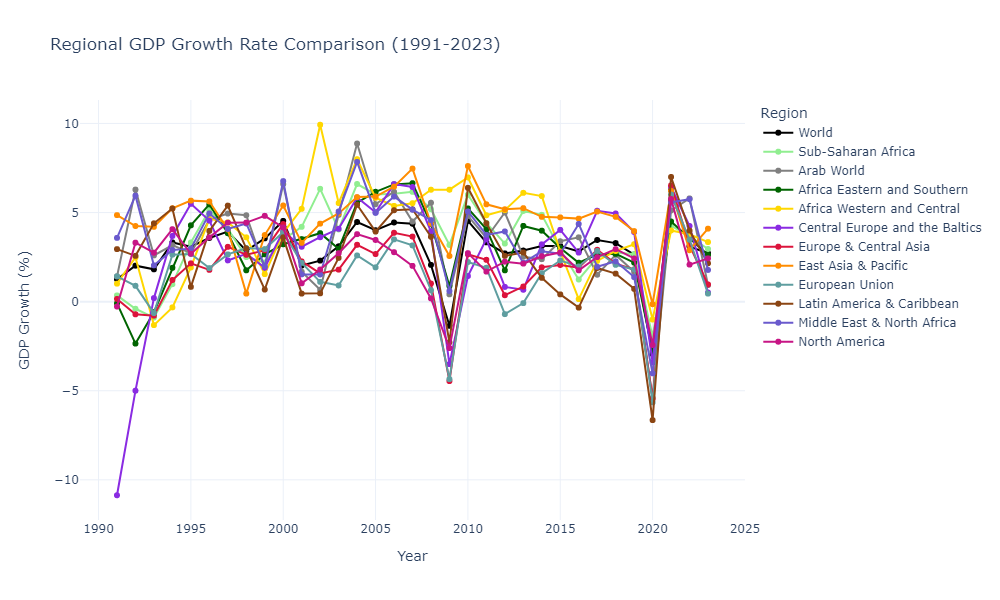

In [30]:
# Filter out the specified rows
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]


# Plotly line chart with custom color sequence using filtered data
fig = px.line(
    df_filtered, 
    x='Year', 
    y='GDP growth (annual %)', 
    color='Region',  
    title='Regional GDP Growth Rate Comparison (1991-2023)',  
    labels={'GDP growth (annual %)': 'GDP Growth (%)', 'Year': 'Year'},  
    template='plotly_white',  
    markers=True,  # Show markers at each data point
    width=1000,    # Increase the width of the chart
    height=600,    # Increase the height of the chart
    color_discrete_sequence=custom_colors  # Use the custom color sequence
)

# Show the figure
fig.show("png")


 ####  Are there noticeable trends or patterns in GDP growth for specific regions over the years?
 There are noticeable trends in 2009 and 2020. In 2009, the global economy slowed down because of the 2008 financial crisis, causing lower GDP growth in many regions. Sub-Saharan Africa, among others, was affected as trade and investment declined. In 2020, the COVID-19 pandemic caused another major economic slowdown. Lockdowns and restrictions led to reduced economic activity, especially in regions that depend on global trade. Both 2009 and 2020 saw declines in GDP growth due to global events impacting economies worldwide.

### iii) What specific regions or countries showed the strongest or weakest GDP growth recovery after 2009 and 2020, based on the data?

#### 2008 financial crisis

In [31]:
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

# Filter data for the 2009 crisis
crisis_years_2009 = df_filtered[df_filtered['Year'].isin([2007, 2008, 2009])]
recovery_years_2009 = df_filtered[df_filtered['Year'].isin([2010, 2011, 2012,2013])]

# Calculate average GDP growth for crisis and recovery periods by region
crisis_avg_2009 = crisis_years_2009.groupby('Region')['GDP growth (annual %)'].mean().reset_index(name='Avg_GDP_Crisis')
recovery_avg_2009 = recovery_years_2009.groupby('Region')['GDP growth (annual %)'].mean().reset_index(name='Avg_GDP_Recovery')

# Merge and calculate recovery rate
recovery_2009 = pd.merge(crisis_avg_2009, recovery_avg_2009, on='Region')
recovery_2009['GDP_Recovery'] = recovery_2009['Avg_GDP_Recovery'] - recovery_2009['Avg_GDP_Crisis']

# Display the full DataFrame for the 2009 crisis
recovery_2009.sort_values(by='GDP_Recovery', ascending=False)


,Region,Avg_GDP_Crisis,Avg_GDP_Recovery,GDP_Recovery
9,North America,-0.138300,2.196761,2.335062
7,Latin America & Caribbean,2.181070,4.027776,1.846706
11,World,1.693330,3.358504,1.665174
5,Europe & Central Asia,0.070094,1.553666,1.483572
4,East Asia & Pacific,4.804157,5.874896,1.070739
6,European Union,-0.183773,0.835392,1.019164
2,Arab World,3.484984,3.977759,0.492775
8,Middle East & North Africa,3.443747,3.730155,0.286409
0,Africa Eastern and Southern,3.966007,3.827338,-0.138669
10,Sub-Saharan Africa,4.844055,4.689667,-0.154388


After 2009, North America had the strongest recovery with a 2.34 growth rate, thanks to large stimulus packages and financial aid. Latin America & Caribbean (1.85) and the World (1.67) also recovered strongly due to global trade recovery.

On the weaker end, regions like Africa Western and Central (-0.26) and Sub-Saharan Africa (-0.15) were less affected by the recession but struggled to recover due to limited industrialization, lower foreign investment, and reduced financial aid from high-income countries.

#### 2020 Global pandemic

In [32]:
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

# Filter data for the 2020 crisis
crisis_years_2020 = df_filtered[df_filtered['Year'].isin([2019, 2020])]
recovery_years_2020 = df_filtered[df_filtered['Year'].isin([2021, 2022, 2023])]

# Calculate average GDP growth for crisis and recovery periods by region
crisis_avg_2020 = crisis_years_2020.groupby('Region')['GDP growth (annual %)'].mean().reset_index(name='Avg_GDP_Crisis')
recovery_avg_2020 = recovery_years_2020.groupby('Region')['GDP growth (annual %)'].mean().reset_index(name='Avg_GDP_Recovery')

# Merge and calculate recovery rate
recovery_2020 = pd.merge(crisis_avg_2020, recovery_avg_2020, on='Region')
recovery_2020['GDP_Recovery'] = recovery_2020['Avg_GDP_Recovery'] - recovery_2020['Avg_GDP_Crisis']

# Display the full DataFrame for the 2009 crisis
recovery_2020.sort_values(by='GDP_Recovery', ascending=False)


,Region,Avg_GDP_Crisis,Avg_GDP_Recovery,GDP_Recovery
7,Latin America & Caribbean,-2.965252,4.379269,7.344521
2,Arab World,-1.864934,3.946516,5.811450
8,Middle East & North Africa,-1.322475,4.367098,5.689573
5,Europe & Central Asia,-1.828594,3.548461,5.377055
6,European Union,-1.923772,3.312678,5.236451
11,World,-0.144913,4.022931,4.167844
0,Africa Eastern and Southern,-0.295560,3.558038,3.853597
3,Central Europe and the Baltics,0.245523,3.730725,3.485202
9,North America,-0.005811,3.423192,3.429003
10,Sub-Saharan Africa,0.346425,3.626865,3.280440


The data on the 2020 pandemic shows that regions like Latin America & Caribbean (GDP recovery of 7.34) and the Arab World (5.81) had the strongest recoveries. This was likely due to effective economic measures and support from governments. Middle East & North Africa (5.69) also saw strong growth, showing resilience in key sectors.

On the weaker side, regions like East Asia & Pacific (2.49) and Africa Western and Central (2.60) had slower recoveries. This is partly because they were not as severely affected by the pandemic, so their economies didn’t have as much ground to make up compared to other regions.

### iv) How does GDP per capita growth correlate with  GDP growth across regions?

In [33]:
# Calculate correlation between GDP per capita and GDP PPP
correlation = df['GDP per capita, PPP (constant 2021 international $)'].corr(df['GDP, PPP (in billions)'])

# Display the correlation value
correlation


0.2735696628261771

In [34]:
correlation2 = df['GDP per capita growth (annual %)'].corr(df['GDP growth (annual %)'])

# Display the correlation value
correlation2

0.9204495602165728

In [35]:
# Group by region and calculate the correlation between 'GDP growth (annual %)' and 'GDP per capita growth (annual %)'
correlation_by_region = df.groupby('Region')[['GDP growth (annual %)', 'GDP per capita growth (annual %)']].corr().iloc[0::2, -1].reset_index()

# Rename columns for clarity
correlation_by_region.columns = ['Region', 'Metric', 'Correlation']

# Sort by correlation to identify regions with highest and lowest correlations
correlation_by_region = correlation_by_region.sort_values(by='Correlation', ascending=False)

# Display the result
correlation_by_region


,Region,Metric,Correlation
1,Africa Western and Central,GDP growth (annual %),0.999583
14,Sub-Saharan Africa,GDP growth (annual %),0.999488
0,Africa Eastern and Southern,GDP growth (annual %),0.999335
6,European Union,GDP growth (annual %),0.998124
9,Low income,GDP growth (annual %),0.997754
5,Europe & Central Asia,GDP growth (annual %),0.997646
3,Central Europe and the Baltics,GDP growth (annual %),0.997642
7,High income,GDP growth (annual %),0.996504
2,Arab World,GDP growth (annual %),0.994184
16,World,GDP growth (annual %),0.992332


A high correlation indicates that regions experiencing high overall GDP growth are also seeing corresponding growth in GDP per capita. In simpler terms, as the economy of a region grows, the income per person (on average) is also increasing.

### v) Which regions experienced the highest GDP  growth rate over the past three decades?

In [36]:
df_filtered = df[~df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

# Calculate total GDP growth over the period for each region
gdp_growth = df_filtered.groupby('Region')['GDP growth (annual %)'].sum().reset_index()

# Sort regions by total GDP growth
highest_growth_regions = gdp_growth.sort_values(by='GDP growth (annual %)', ascending=False)

# Display the top regions
highest_growth_regions=highest_growth_regions.reset_index(drop=True)
highest_growth_regions

,Region,GDP growth (annual %)
0,East Asia & Pacific,153.197492
1,Africa Western and Central,130.244472
2,Middle East & North Africa,116.246888
3,Arab World,114.736032
4,Sub-Saharan Africa,113.147767
5,Africa Eastern and Southern,100.487311
6,World,96.396573
7,Latin America & Caribbean,85.198639
8,Central Europe and the Baltics,82.186032
9,North America,80.704637


The data shows that East Asia & Pacific had the highest GDP growth over the past three decades, with an impressive annual growth rate of 153.20%. Africa Western and Central followed closely behind, growing by 130.24%, which indicates strong economic development in that area.

Other regions with notable growth include Middle East & North Africa (116.25%), Arab World (114.74%), and Sub-Saharan Africa (113.15%), all showing significant increases in their economies.

On the other hand, regions like Europe & Central Asia (56.45%) and the European Union (53.26%) experienced much slower growth, likely due to challenges from economic downturns and the effects of the global financial crisis.

Overall, this data highlights that regions like East Asia and parts of Africa have made remarkable economic progress, reflecting different growth patterns and factors affecting their economies.

In [37]:
df['Region'].unique()

array(['Upper middle income', 'Middle income', 'Low income',
       'Lower middle income', 'High income', 'World',
       'Sub-Saharan Africa', 'Arab World', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Central Europe and the Baltics',
       'Europe & Central Asia', 'East Asia & Pacific', 'European Union',
       'Latin America & Caribbean', 'Middle East & North Africa',
       'North America'], dtype=object)

## OBJECTIVE 4: Analysing different income levels

## Question: Is the economic gap widening or closing?

### i) Are there significant disparities in economic growth between low income and high income regions?

#### calculating Averages

In [38]:
# Define the regions of interest (income levels)
regions_of_interest = ['Low income', 'Lower middle income','Middle income', 'Upper middle income', 'High income']

# Filter the DataFrame to include only the regions of interest
filtered_df = df[df['Region'].isin(regions_of_interest)]

# Group by the filtered regions and calculate the average for the selected columns
average_disparities = filtered_df.groupby('Region')[[ 
    'GDP per capita, PPP (constant 2021 international $)', 
    'GDP per capita growth (annual %)', 
    'GDP growth (annual %)', 
    'GDP (in billions)', 
    'GDP, PPP (in billions)'
]].mean().reset_index()

# Sort the results by one of the columns (e.g., GDP growth) for better readability
average_disparities = average_disparities.sort_values(by='GDP per capita, PPP (constant 2021 international $)', ascending=False)

# Display the result
average_disparities


,Region,"GDP per capita, PPP (constant 2021 international $)",GDP per capita growth (annual %),GDP growth (annual %),GDP (in billions),"GDP, PPP (in billions)"
0,High income,45583.756687,1.550627,2.072927,41453.806061,59931.969697
4,Upper middle income,11854.537818,4.364374,5.305317,12463.620303,30654.221212
3,Middle income,8494.837624,3.854957,5.231386,15697.419394,43546.054545
2,Lower middle income,5070.292343,3.138188,4.969276,3233.810000,12866.587273
1,Low income,1974.290798,0.584909,3.422551,277.351030,986.834606


Yes, there are significant disparities in economic growth between low income and high income regions.

The data shows clear economic differences between low-income and high-income regions. High-income areas have a GDP per capita of about 45,584 USD, while low-income regions only have around 1,974 USD.

Although low-income regions have a higher annual GDP growth rate of about 3.42% compared to 2.07% in high-income regions, this is mainly due to their smaller economies. The total GDP further highlights the gap, with high-income regions contributing over 41.4 trillion USD, while low-income regions only account for about 0.28 billion USD.

These numbers reveal ongoing challenges in achieving fair economic growth, even with higher growth rates in low-income regions.

#### i) visualization for the average GDP values for low, lower middle, middle, upper middle, and high-income regions?

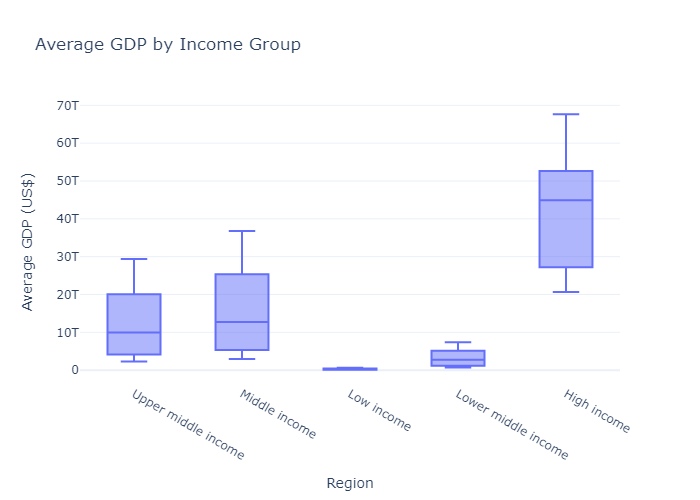

In [39]:
df_filtered = df[df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]
fig = px.box(
    df_filtered, 
    x='Region', 
    y='GDP (current US$)', 
    title='Average GDP by Income Group',
    labels={'GDP (current US$)': 'Average GDP (US$)'},
    template='plotly_white'
)
fig.show("png")
	

### ii) What is the percentage contribution of each income group to the world GDP?

In [40]:
df_filtered = df[df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income', 'World'])]

gdp_2023 = df_filtered[df_filtered['Year'] == 2023]

# Calculate total GDP of the world
total_gdp_world = gdp_2023[gdp_2023['Region'] == 'World']['GDP (current US$)'].values[0]

# Add a new column for percentage contribution of each region using .loc
gdp_2023 = gdp_2023.copy()  # Create a copy of the DataFrame to avoid the warning
gdp_2023.loc[:, 'Percentage Contribution'] = (gdp_2023['GDP (current US$)'] / total_gdp_world) * 100

# Select relevant columns for display
gdp_contributions = gdp_2023[['Region', 'GDP (current US$)', 'Percentage Contribution']]
gdp_contributions = gdp_contributions.sort_values(by='Percentage Contribution', ascending=False)

# Display the resulting DataFrame
gdp_contributions


,Region,GDP (current US$),Percentage Contribution
197,World,1.054350e+14,100.000000
164,High income,6.765370e+13,64.166264
65,Middle income,3.678690e+13,34.890596
32,Upper middle income,2.940370e+13,27.887988
131,Lower middle income,7.384750e+12,7.004078
98,Low income,6.467980e+11,0.613457


The data shows that high-income regions contribute the majority of the world's GDP at 64.17%, while middle-income regions make up 34.89%. Upper middle-income regions alone account for 27.89%, significantly more than lower middle-income regions at 7.00%. Low-income regions contribute only 0.61%, highlighting the vast economic disparity among income groups.




### iii) What is the average Growth rate and percentage growth for each region.

In [41]:
# calculate average Growth rate
df_filtered = df[df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

average_growth_rate= df_filtered.groupby('Region')['GDP growth (annual %)'].mean().reset_index()

average_growth_rate_sort=average_growth_rate.sort_values(by='GDP growth (annual %)',ascending=False)
average_growth_rate_sort.reset_index(drop=True)

,Region,GDP growth (annual %)
0,Upper middle income,5.305317
1,Middle income,5.231386
2,Lower middle income,4.969276
3,Low income,3.422551
4,High income,2.072927


The data indicates that upper middle-income regions have the highest annual GDP growth rate at 5.31%, followed closely by middle-income regions at 5.23%. Lower middle-income regions grow at 4.97%, while low-income regions have a growth rate of 3.42%. High-income regions, despite having the largest GDP, have the lowest growth rate at 2.07%, reflecting the slower growth typical of more developed economies.

In [42]:
# calculate percentage increase

df_filtered = df[df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

# Filter data for 1991 and 2023
data_growth_1991 = df_filtered[df_filtered['Year'] == 1991][['Region','GDP growth (annual %)']]
data_growth_2023 = df_filtered[df_filtered['Year'] == 2023][['Region', 'GDP growth (annual %)']]

# Rename the columns for clarity
data_growth_1991.columns = ['Region', 'GDP_growth_1991']
data_growth_2023.columns = ['Region', 'GDP_growth_2023']

# Merge the two datasets on 'Country Name'
gdp_growth_comparison = pd.merge(data_growth_1991, data_growth_2023, on='Region')

# Calculate the percentage increase
gdp_growth_comparison['GDP growth Percentage Increase'] = ((gdp_growth_comparison['GDP_growth_2023'] - gdp_growth_comparison['GDP_growth_1991']) / gdp_growth_comparison['GDP_growth_1991']) * 100

# Display the result
gdp_growth_comparison=gdp_growth_comparison[['Region', 'GDP growth Percentage Increase']].sort_values(by='GDP growth Percentage Increase',ascending=False).reset_index(drop=True)
gdp_growth_comparison

,Region,GDP growth Percentage Increase
0,Lower middle income,152.260421
1,Low income,143.409546
2,High income,82.104677
3,Middle income,58.978647
4,Upper middle income,41.420020


The data shows that lower middle-income regions have the highest GDP growth percentage increase at 152.26%, followed by low-income regions at 143.41%. High-income regions, despite their already substantial GDP levels, exhibit an 82.10% increase. Middle-income regions have a 58.98% growth rate, while upper middle-income regions show the smallest increase at 41.42%. This highlights the rapid growth potential in lower-income regions.

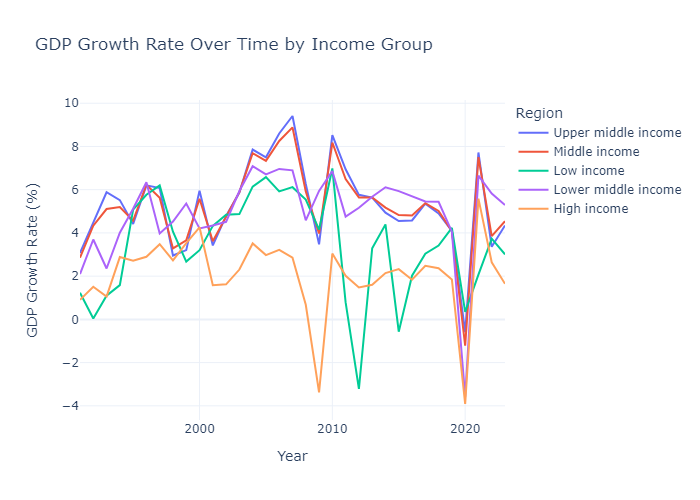

In [43]:
fig = px.line(
    df[df['Region'].isin(regions_of_interest)], 
    x='Year', 
    y='GDP growth (annual %)', 
    color='Region', 
    title='GDP Growth Rate Over Time by Income Group',
    labels={'GDP growth (annual %)': 'GDP Growth Rate (%)'},
    template='plotly_white'
)
fig.show("png")


#### GDP PER CAPITA ANALYSIS

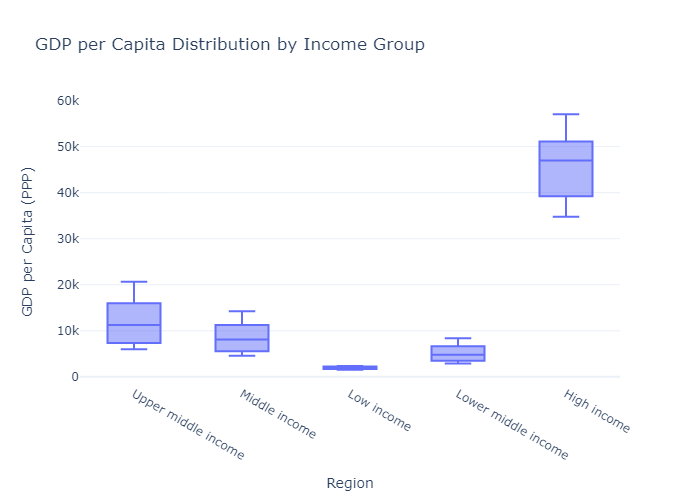

In [44]:
fig = px.box(
    df[df['Region'].isin(regions_of_interest)], 
    x='Region', 
    y='GDP per capita, PPP (constant 2021 international $)', 
    title='GDP per Capita Distribution by Income Group',
    labels={'GDP per capita, PPP (constant 2021 international $)': 'GDP per Capita (PPP)'},
    template='plotly_white'
)
fig.show("png")


In [45]:
df.columns


Index(['Region', 'Region Code', 'Year', 'GDP (current US$)',
       'GDP per capita, PPP (constant 2021 international $)',
       'GDP per capita growth (annual %)',
       'GDP, PPP (constant 2021 international $)', 'GDP growth (annual %)',
       'GDP (in billions)', 'GDP, PPP (in billions)'],
      dtype='object')

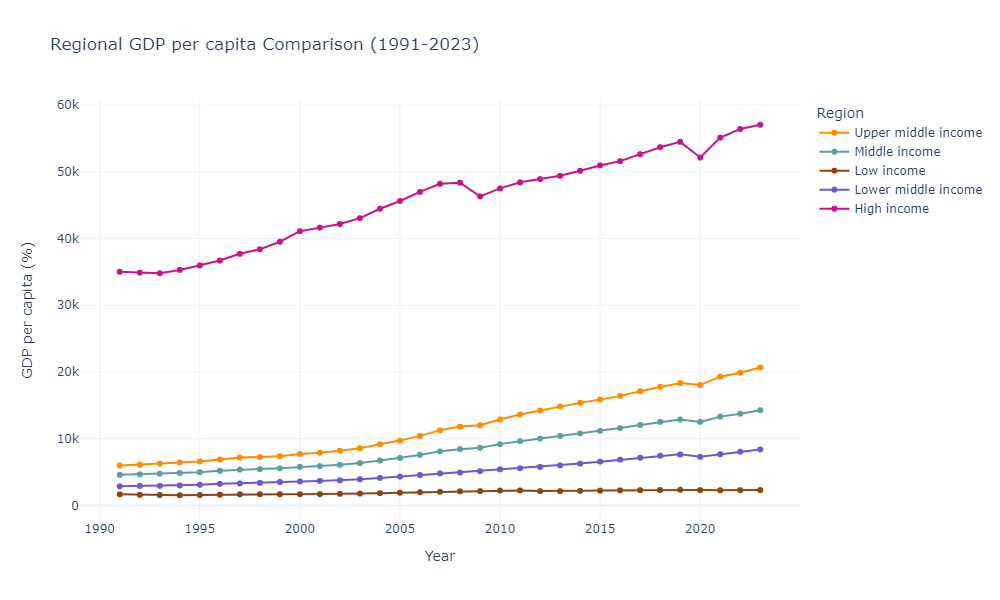

In [46]:
# Filter out the specified rows
df_filtered = df[df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

custom_colors = [ '#FF8C00', '#5F9EA0', '#8B4513', '#6A5ACD', '#C71585']

# Plotly line chart with custom color sequence using filtered data
fig = px.line(
    df_filtered, 
    x='Year', 
    y='GDP per capita, PPP (constant 2021 international $)', 
    color='Region',  
    title='Regional GDP per capita Comparison (1991-2023)',  
    labels={'GDP per capita, PPP (constant 2021 international $)': 'GDP per capita (%)', 'Year': 'Year'},  
    template='plotly_white',  
    markers=True,  # Show markers at each data point
    width=1000,    # Increase the width of the chart
    height=600,    # Increase the height of the chart
    color_discrete_sequence=custom_colors  # Use the custom color sequence
)

# Show the figure
fig.show("png")


GDP per capita is much higher in high-income countries because they have advanced economies, better infrastructure, and focus on high-value industries. Upper middle-income countries have higher GDP per capita than low-income countries but still fall short of high-income nations, as they are often transitioning and still rely on lower-value sectors. Low-income countries mainly depend on agriculture and low-wage jobs, leading to slower growth. This significant difference makes it hard for these countries to catch up with high-income nations.

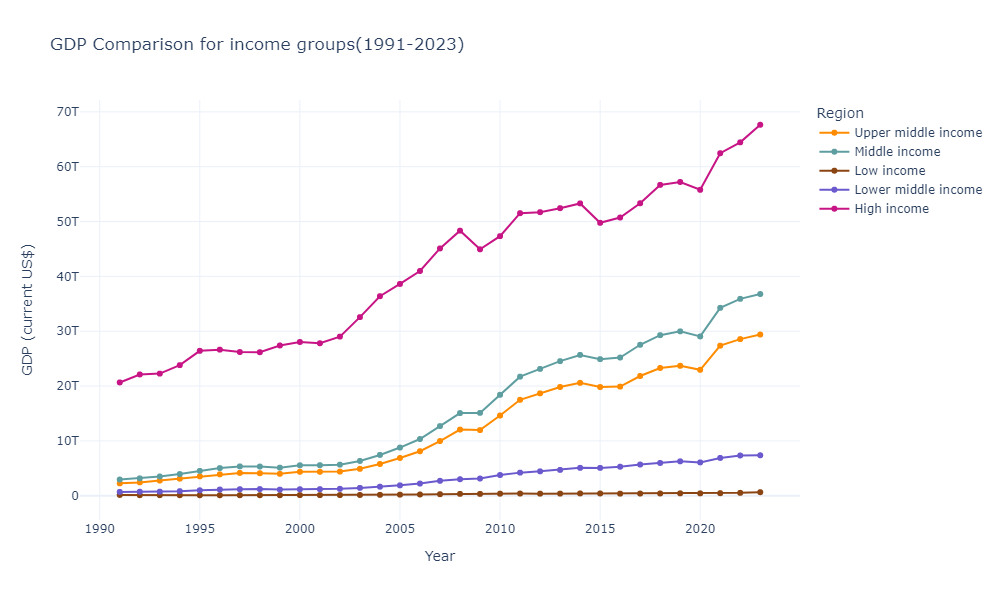

In [47]:
# Filter out the specified rows
df_filtered = df[df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

custom_colors = [ '#FF8C00', '#5F9EA0', '#8B4513', '#6A5ACD', '#C71585']

# Plotly line chart with custom color sequence using filtered data
fig = px.line(
    df_filtered, 
    x='Year', 
    y='GDP (current US$)', 
    color='Region',  
    title=' GDP Comparison for income groups(1991-2023)',  
    labels={'GDP (current US$))': 'GDP(US$)', 'Year': 'Year'},  
    template='plotly_white',  
    markers=True,  # Show markers at each data point
    width=1000,    # Increase the width of the chart
    height=600,    # Increase the height of the chart
    color_discrete_sequence=custom_colors  # Use the custom color sequence
)

# Show the figure
fig.show("png")


The data shows that middle-income countries have a higher total GDP than upper-middle-income countries. This may be largely due to population size. Middle-income countries, like India and Indonesia, have very large populations, which can boost their overall GDP despite lower individual incomes(GDP per Capita). In contrast, upper-middle-income countries tend to have smaller populations, so even though they are wealthier per person, their total GDP is lower. Additionally, some middle-income countries are growing faster, which also contributes to their larger overall GDP, while upper-middle-income nations may face slower growth or economic challenges.




### HEATMAP FOR GDP

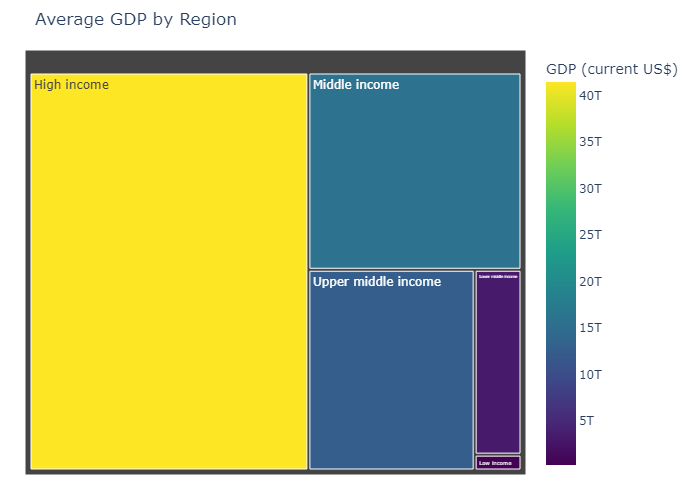

In [48]:
df_filtered = df[df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]

# Aggregating GDP per capita by region (average GDP per capita per region)
region_gdp = df_filtered.groupby('Region')['GDP (current US$)'].mean().reset_index()

# Creating a heatmap using Plotly Express
fig = px.treemap(region_gdp, 
                 path=['Region'], 
                 values='GDP (current US$)',
                 color='GDP (current US$)', 
                 color_continuous_scale='Viridis',
                 title='Average GDP by Region')

# Update layout for better visualization
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# Show the figure
fig.show("png")

### iii) What would be the time frame for other income groups to reach the average GDP of high-income countries in 2023, based on their current GDP and average growth rates?

In [49]:
# 2023 information
df_filtered = df[df['Region'].isin(['Low income', 'Lower middle income', 'Middle income', 'Upper middle income', 'High income'])]
df_filtered[df_filtered['Year']== 2023]

,Region,Region Code,Year,GDP (current US$),"GDP per capita, PPP (constant 2021 international $)",GDP per capita growth (annual %),"GDP, PPP (constant 2021 international $)",GDP growth (annual %),GDP (in billions),"GDP, PPP (in billions)"
32,Upper middle income,UMC,2023,2.940370e+13,20657.989180,4.073805,5.806110e+13,4.346249,29403.700,58061.10
65,Middle income,MIC,2023,3.678690e+13,14272.977780,3.710971,8.378460e+13,4.539565,36786.900,83784.60
98,Low income,LIC,2023,6.467980e+11,2313.907214,0.262180,1.672920e+12,3.005655,646.798,1672.92
131,Lower middle income,LMC,2023,7.384750e+12,8390.090364,3.942993,2.567000e+13,5.291647,7384.750,25670.00
164,High income,HIC,2023,6.765370e+13,57034.440740,1.131157,8.002050e+13,1.644160,67653.700,80020.50


In [50]:
# Define GDP values and growth rates
GDP_high_income = 6.765370e+13	  # GDP of high-income country
GDP_low_income = 6.467980e+11	  # GDP of low-income country
growth_rate_low_income = 0.034    # annual growth rate for low-income country

# Calculate the time required to catch up
years_to_catch_up = np.log(GDP_high_income / GDP_low_income) / np.log(1 + growth_rate_low_income)

# Print the result
print(f"It will take approximately {years_to_catch_up:.2f} years for the low-income countries average GDP to reach the high-income countries current average GDP.")


It will take approximately 139.08 years for the low-income countries average GDP to reach the high-income countries current average GDP.


In [51]:
# Define GDP values and growth rates
GDP_high_income = 6.765370e+13	  # GDP of high-income country
GDP_low_middle_income =7.384750e+12	  # GDP of low-income country
growth_rate_low_middle_income = 0.050	    # annual growth rate for low-income country

# Calculate the time required to catch up
years_to_catch_up = np.log(GDP_high_income / GDP_low_middle_income) / np.log(1 + growth_rate_low_middle_income)

# Print the result
print(f"It will take approximately {years_to_catch_up:.2f} years for the lower middle-income countries average GDP to reach the high-income countries current average GDP.")


It will take approximately 45.40 years for the lower middle-income countries average GDP to reach the high-income countries current average GDP.


In [52]:
# Define GDP values and growth rates
GDP_high_income = 6.765370e+13	  # GDP of high-income country
GDP_middle_income =3.678690e+13		  # GDP of middle-income country
growth_rate_middle_income = 0.052	    # annual growth rate for middle-income country

# Calculate the time required to catch up
years_to_catch_up = np.log(GDP_high_income / GDP_middle_income) / np.log(1 + growth_rate_middle_income)

# Print the result
print(f"It will take approximately {years_to_catch_up:.2f} years for the middle-income countries average GDP to reach the high-income countries current average GDP.")


It will take approximately 12.02 years for the middle-income countries average GDP to reach the high-income countries current average GDP.


In [53]:
# Define GDP values and growth rates
GDP_high_income = 6.765370e+13	  # GDP of high-income country
GDP_upper_middle_income =	3.678690e+13  # GDP of low-income country
growth_rate_upper_middle_income = 0.053    # annual growth rate for low-income country

# Calculate the time required to catch up
years_to_catch_up = np.log(GDP_high_income / GDP_upper_middle_income) / np.log(1 + growth_rate_upper_middle_income)

# Print the result
print(f"It will take approximately {years_to_catch_up:.2f} years for the upper middle-income countries average GDP to reach the high-income countries current average GDP.")


It will take approximately 11.80 years for the upper middle-income countries average GDP to reach the high-income countries current average GDP.


### Answer: 
The economic gap between low-income and high-income regions is largely widening, despite some signs of growth in low-income areas. High-income countries have a much higher GDP per capita, averaging around 45,584 USD, compared to only 1,974 USD in low-income countries.

While low-income regions show a higher annual GDP growth rate of about 3.42%, this is mainly because their economies are smaller. In total GDP, high-income regions contribute over 41.4 trillion USD, while low-income regions account for only about 0.28 billion USD.

Even though lower middle-income and middle-income countries are growing faster, the significant differences in GDP and the slow pace of improvement for low-income regions indicate ongoing challenges. Thus, the overall economic gap remains a concern.






